In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("youtube_video_data_full.csv")
df.head()

,video_id,title,description_length,publish_date,category_id,tags_count,view_count,like_count,comment_count,duration_sec,thumbnail_brightness,face_count,channel_title,subscriber_count,channel_country,upload_hour,upload_day,days_since_upload,est_views_7d,est_views_30d
0,Ye8NxLnh8qE,Parkhi Rahechu (Official Music Video),1373,2025-06-24T16:15:06Z,10,0,872734,61779,3352,301,69.310378,0,John Rai,448000,US,16,Tuesday,8,763642,872734
1,fGF10RLUm1U,K Garu | Official Music Video |,1464,2024-07-29T14:32:12Z,10,5,18317536,213300,5418,391,52.409551,0,John Rai,448000,US,14,Monday,338,379357,1625816
2,K_XcqhPtmzo,Hawa Jastai - John Chamling Rai | Official Mus...,1958,2023-06-30T10:15:11Z,10,17,27908401,320411,13720,410,79.515843,1,John Rai,448000,US,10,Friday,733,266519,1142226
3,M_AeBRELg4w,NIHITA (निहित),466,2022-06-08T12:13:59Z,10,18,25827008,140333,1998,187,18.923227,1,John Rai,448000,US,12,Wednesday,1120,161418,691794
4,FRled0BaA_Q,Malai Jitnu Xa (PUBG MOBILE Nepal ft. John Rai),1778,2025-04-27T14:24:36Z,10,27,188905,21709,1161,202,51.961427,2,John Rai,448000,US,14,Sunday,66,20035,85865


In [3]:
df["title_length"]=df["title"].apply(len)
df=df.drop(columns=["video_id","title","publish_date","category_id","view_count","like_count","comment_count","channel_title","channel_country","days_since_upload"])
df

,description_length,tags_count,duration_sec,thumbnail_brightness,face_count,subscriber_count,upload_hour,upload_day,est_views_7d,est_views_30d,title_length
0,1373,0,301,69.310378,0,448000,16,Tuesday,763642,872734,37
1,1464,5,391,52.409551,0,448000,14,Monday,379357,1625816,31
2,1958,17,410,79.515843,1,448000,10,Friday,266519,1142226,96
3,466,18,187,18.923227,1,448000,12,Wednesday,161418,691794,14
4,1778,27,202,51.961427,2,448000,14,Sunday,20035,85865,47
...,...,...,...,...,...,...,...,...,...,...,...
134,638,10,350,59.649147,0,93000,10,Wednesday,1881,8061,40
135,262,5,285,3.305347,0,93000,15,Tuesday,113,487,60
136,405,11,245,60.521495,0,93000,10,Monday,20,87,44
137,1337,22,244,74.725434,1,93000,12,Monday,281,1206,56


In [4]:
df["est_views_7d"].max()

763642

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

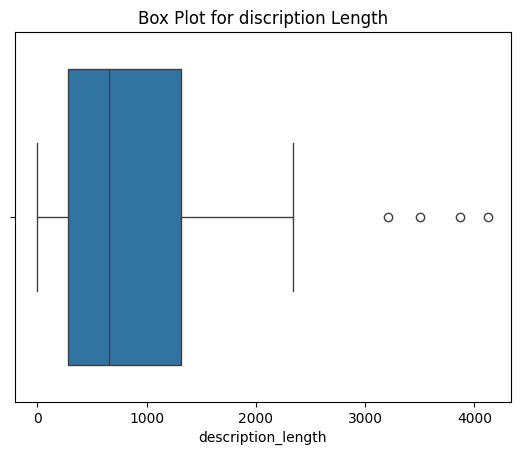

In [6]:
sns.boxplot(x=df["description_length"],data=df)
plt.title("Box Plot for discription Length")
plt.show()

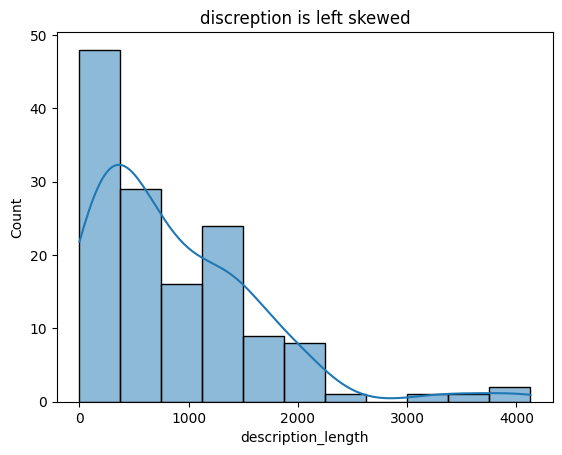

In [7]:
sns.histplot(data=df,x="description_length",kde=True)
plt.title("discreption is left skewed")
plt.show()

In [8]:
df["description_length"].skew()

1.5826956579017144

In [9]:
from sklearn.preprocessing import PowerTransformer
feature=df[["description_length"]].copy()
pt= PowerTransformer(method="yeo-johnson")
df["discription_length_transformed"]=pt.fit_transform(feature)
print("skewness:",df["discription_length_transformed"].skew())
df=df.drop(columns=["description_length"])

skewness: -0.10536428498783637


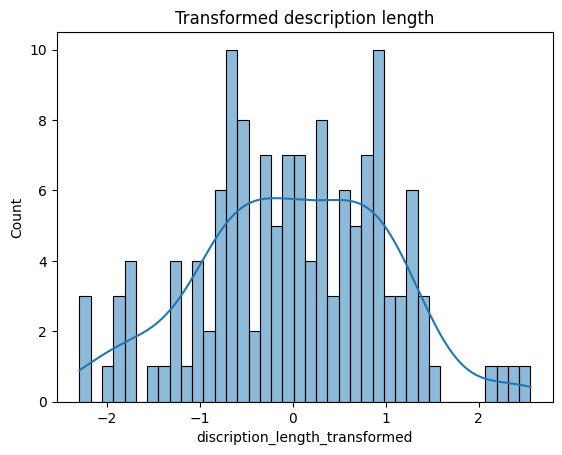

In [10]:
sns.histplot(x="discription_length_transformed",data=df,kde=True,bins=40)
plt.title("Transformed description length")
plt.show()

In [11]:
df

,tags_count,duration_sec,thumbnail_brightness,face_count,subscriber_count,upload_hour,upload_day,est_views_7d,est_views_30d,title_length,discription_length_transformed
0,0,301,69.310378,0,448000,16,Tuesday,763642,872734,37,0.828716
1,5,391,52.409551,0,448000,14,Monday,379357,1625816,31,0.910840
2,17,410,79.515843,1,448000,10,Friday,266519,1142226,96,1.309002
3,18,187,18.923227,1,448000,12,Wednesday,161418,691794,14,-0.292002
4,27,202,51.961427,2,448000,14,Sunday,20035,85865,47,1.172050
...,...,...,...,...,...,...,...,...,...,...,...
134,10,350,59.649147,0,93000,10,Wednesday,1881,8061,40,-0.012079
135,5,285,3.305347,0,93000,15,Tuesday,113,487,60,-0.725854
136,11,245,60.521495,0,93000,10,Monday,20,87,44,-0.406619
137,22,244,74.725434,1,93000,12,Monday,281,1206,56,0.795294


In [12]:
# calculating skewness for tags_count
df["tags_count"].skew()

1.4199700655452525

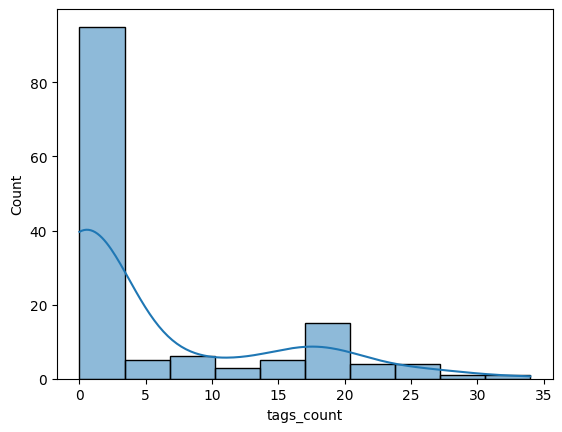

In [13]:
sns.histplot(df["tags_count"],kde=True)
plt.show()

In [14]:
feature2=df[["tags_count"]].copy()
df["transformed_tags_count"]=pt.fit_transform(feature2)
print("skewnes:",df["transformed_tags_count"].skew())
df=df.drop(columns=["tags_count"])

skewnes: 0.3716317251452201


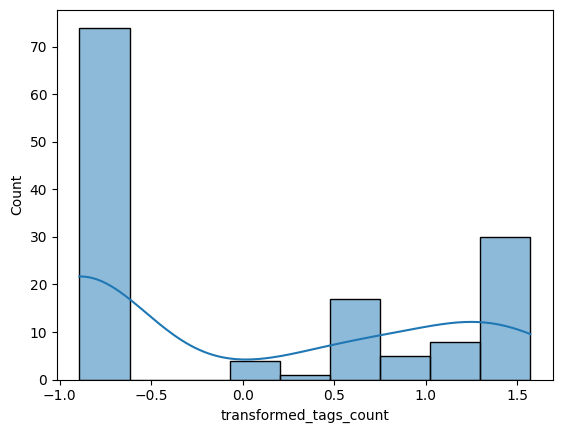

In [15]:
sns.histplot(x="transformed_tags_count",data=df,kde=True)
plt.show()

In [16]:
df

,duration_sec,thumbnail_brightness,face_count,subscriber_count,upload_hour,upload_day,est_views_7d,est_views_30d,title_length,discription_length_transformed,transformed_tags_count
0,301,69.310378,0,448000,16,Tuesday,763642,872734,37,0.828716,-0.891861
1,391,52.409551,0,448000,14,Monday,379357,1625816,31,0.910840,0.845204
2,410,79.515843,1,448000,10,Friday,266519,1142226,96,1.309002,1.366056
3,187,18.923227,1,448000,12,Wednesday,161418,691794,14,-0.292002,1.385251
4,202,51.961427,2,448000,14,Sunday,20035,85865,47,1.172050,1.509197
...,...,...,...,...,...,...,...,...,...,...,...
134,350,59.649147,0,93000,10,Wednesday,1881,8061,40,-0.012079,1.166154
135,285,3.305347,0,93000,15,Tuesday,113,487,60,-0.725854,0.845204
136,245,60.521495,0,93000,10,Monday,20,87,44,-0.406619,1.205007
137,244,74.725434,1,93000,12,Monday,281,1206,56,0.795294,1.449213


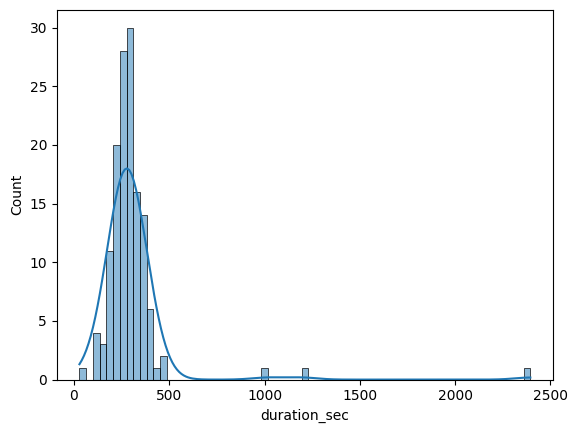

In [17]:
sns.histplot(x="duration_sec",data=df,kde=True)
plt.show()


In [18]:
df["duration_sec"].skew()
df

,duration_sec,thumbnail_brightness,face_count,subscriber_count,upload_hour,upload_day,est_views_7d,est_views_30d,title_length,discription_length_transformed,transformed_tags_count
0,301,69.310378,0,448000,16,Tuesday,763642,872734,37,0.828716,-0.891861
1,391,52.409551,0,448000,14,Monday,379357,1625816,31,0.910840,0.845204
2,410,79.515843,1,448000,10,Friday,266519,1142226,96,1.309002,1.366056
3,187,18.923227,1,448000,12,Wednesday,161418,691794,14,-0.292002,1.385251
4,202,51.961427,2,448000,14,Sunday,20035,85865,47,1.172050,1.509197
...,...,...,...,...,...,...,...,...,...,...,...
134,350,59.649147,0,93000,10,Wednesday,1881,8061,40,-0.012079,1.166154
135,285,3.305347,0,93000,15,Tuesday,113,487,60,-0.725854,0.845204
136,245,60.521495,0,93000,10,Monday,20,87,44,-0.406619,1.205007
137,244,74.725434,1,93000,12,Monday,281,1206,56,0.795294,1.449213


In [19]:
from sklearn.preprocessing import PowerTransformer
feature1=df[["duration_sec"]].copy()
pt=PowerTransformer(method="yeo-johnson")
df["Transformed_duration_sec"]=pt.fit_transform(feature1)
df=df.drop(columns=["duration_sec"])
df

,thumbnail_brightness,face_count,subscriber_count,upload_hour,upload_day,est_views_7d,est_views_30d,title_length,discription_length_transformed,transformed_tags_count,Transformed_duration_sec
0,69.310378,0,448000,16,Tuesday,763642,872734,37,0.828716,-0.891861,0.228716
1,52.409551,0,448000,14,Monday,379357,1625816,31,0.910840,0.845204,0.863943
2,79.515843,1,448000,10,Friday,266519,1142226,96,1.309002,1.366056,0.978697
3,18.923227,1,448000,12,Wednesday,161418,691794,14,-0.292002,1.385251,-0.937975
4,51.961427,2,448000,14,Sunday,20035,85865,47,1.172050,1.509197,-0.747935
...,...,...,...,...,...,...,...,...,...,...,...
134,59.649147,0,93000,10,Wednesday,1881,8061,40,-0.012079,1.166154,0.595481
135,3.305347,0,93000,15,Tuesday,113,487,60,-0.725854,0.845204,0.095540
136,60.521495,0,93000,10,Monday,20,87,44,-0.406619,1.205007,-0.274149
137,74.725434,1,93000,12,Monday,281,1206,56,0.795294,1.449213,-0.284167


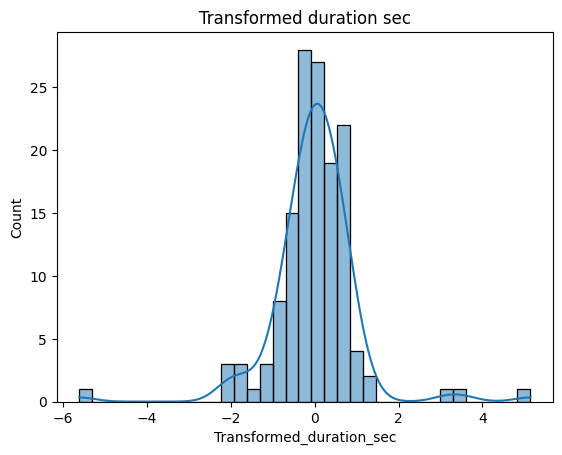

In [20]:
sns.histplot(x="Transformed_duration_sec",data=df,kde=True)
plt.title("Transformed duration sec")
plt.show()

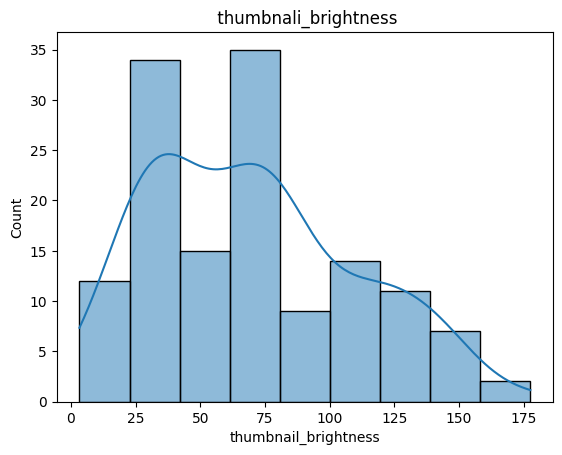

0.49529588127566654

In [21]:
sns.histplot(x="thumbnail_brightness",data=df,kde=True)
plt.title(" thumbnali_brightness")
plt.show()
df["thumbnail_brightness"].skew()

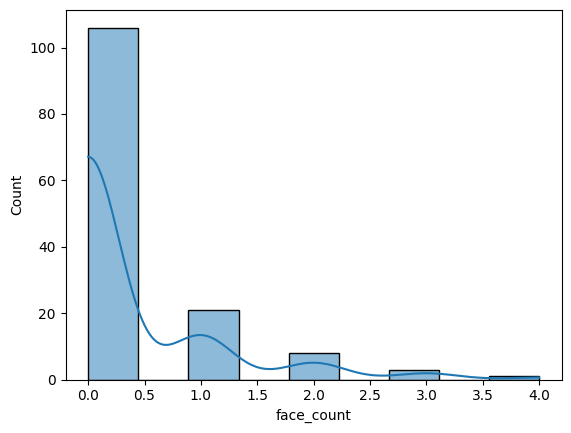

2.4102066044625965

In [22]:
sns.histplot(x="face_count", data=df,kde=True)
plt.show()
df["face_count"].skew()

In [23]:
from sklearn.preprocessing import PowerTransformer
feature2=df[["face_count"]].copy()
pt=PowerTransformer(method="yeo-johnson")
df["Transformed_face_count"]=pt.fit_transform(feature2)
df=df.drop(columns=["face_count"])

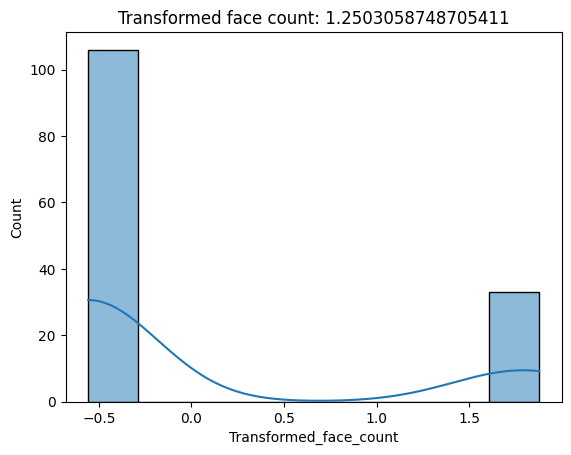

In [24]:
sns.histplot(x="Transformed_face_count",data=df,kde=True)
plt.title(f"Transformed face count: {df["Transformed_face_count"].skew()}")
plt.show()


In [25]:
df

,thumbnail_brightness,subscriber_count,upload_hour,upload_day,est_views_7d,est_views_30d,title_length,discription_length_transformed,transformed_tags_count,Transformed_duration_sec,Transformed_face_count
0,69.310378,448000,16,Tuesday,763642,872734,37,0.828716,-0.891861,0.228716,-0.557765
1,52.409551,448000,14,Monday,379357,1625816,31,0.910840,0.845204,0.863943,-0.557765
2,79.515843,448000,10,Friday,266519,1142226,96,1.309002,1.366056,0.978697,1.750694
3,18.923227,448000,12,Wednesday,161418,691794,14,-0.292002,1.385251,-0.937975,1.750694
4,51.961427,448000,14,Sunday,20035,85865,47,1.172050,1.509197,-0.747935,1.857366
...,...,...,...,...,...,...,...,...,...,...,...
134,59.649147,93000,10,Wednesday,1881,8061,40,-0.012079,1.166154,0.595481,-0.557765
135,3.305347,93000,15,Tuesday,113,487,60,-0.725854,0.845204,0.095540,-0.557765
136,60.521495,93000,10,Monday,20,87,44,-0.406619,1.205007,-0.274149,-0.557765
137,74.725434,93000,12,Monday,281,1206,56,0.795294,1.449213,-0.284167,1.750694


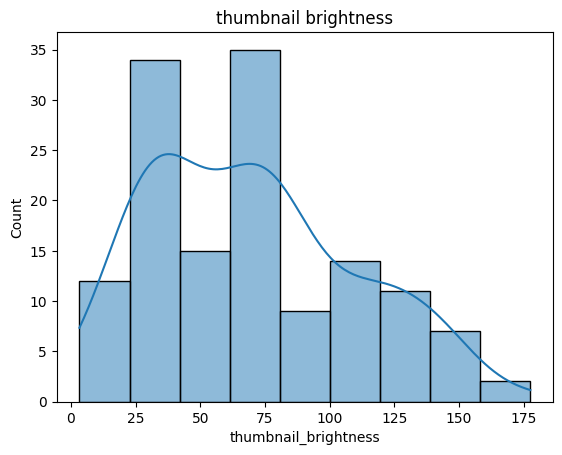

In [26]:
sns.histplot(x="thumbnail_brightness",data=df,kde=True)
plt.title("thumbnail brightness")
plt.show()

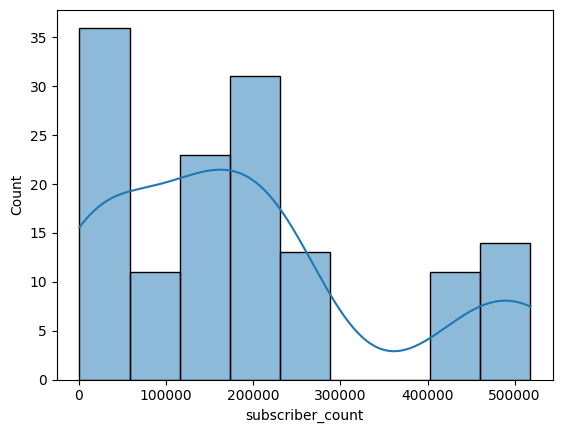

In [27]:
df["subscriber_count"].skew()
sns.histplot(x="subscriber_count",data=df,kde=True)
plt.show()

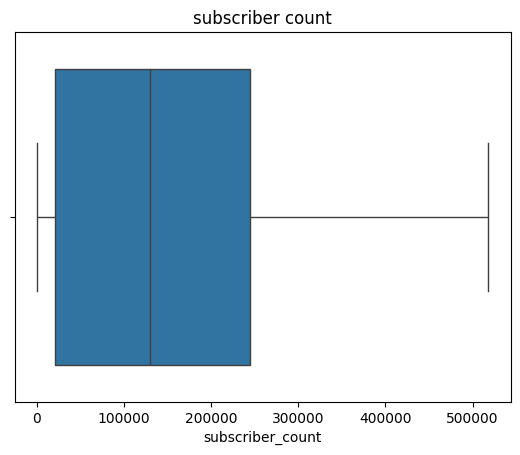

In [28]:
sns.boxplot(x="subscriber_count",data=df)
plt.title("subscriber count")
plt.show()

In [29]:
df["upload_hour"].skew()

-0.38254565808100105

In [30]:
print(df["upload_day"].unique())

['Tuesday' 'Monday' 'Friday' 'Wednesday' 'Sunday' 'Thursday' 'Saturday']


In [31]:
df["upload_day_num"]=df["upload_day"].map({
    'Saturday':0,
     'Sunday':1,
      'Monday':2,
    'Tuesday':3,
    'Wednesday':4,
    'Thursday':5,
    'Friday':6
})
df=df.drop(columns=["upload_day"])

In [32]:
df

,thumbnail_brightness,subscriber_count,upload_hour,est_views_7d,est_views_30d,title_length,discription_length_transformed,transformed_tags_count,Transformed_duration_sec,Transformed_face_count,upload_day_num
0,69.310378,448000,16,763642,872734,37,0.828716,-0.891861,0.228716,-0.557765,3
1,52.409551,448000,14,379357,1625816,31,0.910840,0.845204,0.863943,-0.557765,2
2,79.515843,448000,10,266519,1142226,96,1.309002,1.366056,0.978697,1.750694,6
3,18.923227,448000,12,161418,691794,14,-0.292002,1.385251,-0.937975,1.750694,4
4,51.961427,448000,14,20035,85865,47,1.172050,1.509197,-0.747935,1.857366,1
...,...,...,...,...,...,...,...,...,...,...,...
134,59.649147,93000,10,1881,8061,40,-0.012079,1.166154,0.595481,-0.557765,4
135,3.305347,93000,15,113,487,60,-0.725854,0.845204,0.095540,-0.557765,3
136,60.521495,93000,10,20,87,44,-0.406619,1.205007,-0.274149,-0.557765,2
137,74.725434,93000,12,281,1206,56,0.795294,1.449213,-0.284167,1.750694,2


In [33]:
df["upload_hour"].skew()

-0.38254565808100105

In [34]:
df["est_views_7d"].skew()

3.5860139359872867

In [35]:
from sklearn.preprocessing import PowerTransformer
feature4=df[["est_views_7d"]].copy()
pt=PowerTransformer(method="yeo-johnson")
df["Transformed_target_7"]=pt.fit_transform(feature4)
df=df.drop(columns=["est_views_7d"])
df=df.drop(columns=["est_views_30d"])
df

,thumbnail_brightness,subscriber_count,upload_hour,title_length,discription_length_transformed,transformed_tags_count,Transformed_duration_sec,Transformed_face_count,upload_day_num,Transformed_target_7
0,69.310378,448000,16,37,0.828716,-0.891861,0.228716,-0.557765,3,1.991369
1,52.409551,448000,14,31,0.910840,0.845204,0.863943,-0.557765,2,1.718302
2,79.515843,448000,10,96,1.309002,1.366056,0.978697,1.750694,6,1.580424
3,18.923227,448000,12,14,-0.292002,1.385251,-0.937975,1.750694,4,1.384482
4,51.961427,448000,14,47,1.172050,1.509197,-0.747935,1.857366,1,0.567916
...,...,...,...,...,...,...,...,...,...,...
134,59.649147,93000,10,40,-0.012079,1.166154,0.595481,-0.557765,4,-0.360208
135,3.305347,93000,15,60,-0.725854,0.845204,0.095540,-0.557765,3,-1.463899
136,60.521495,93000,10,44,-0.406619,1.205007,-0.274149,-0.557765,2,-2.131589
137,74.725434,93000,12,56,0.795294,1.449213,-0.284167,1.750694,2,-1.106980


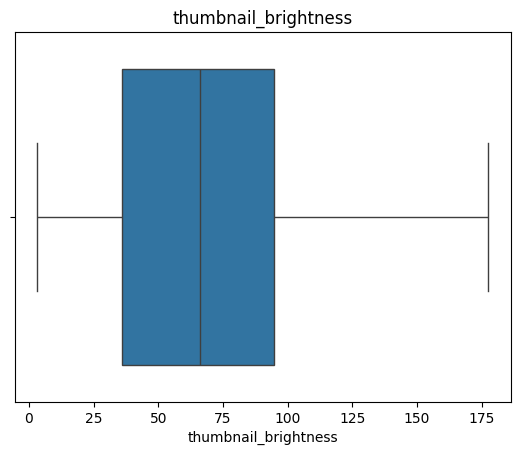

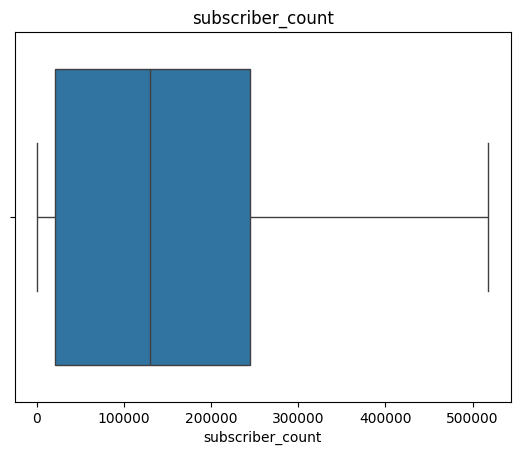

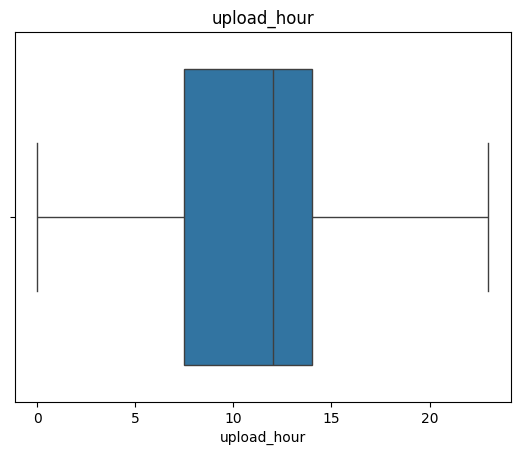

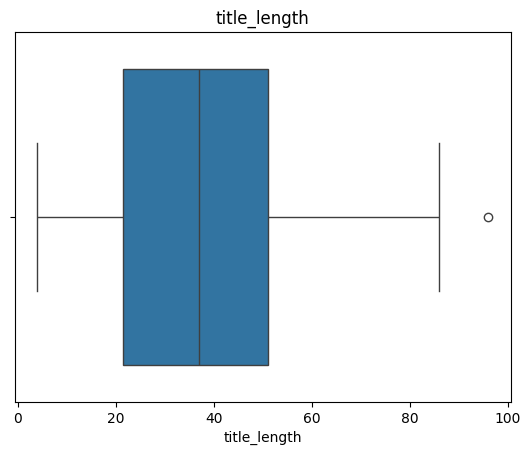

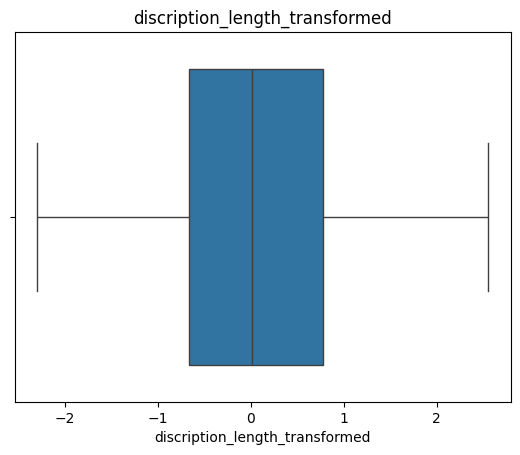

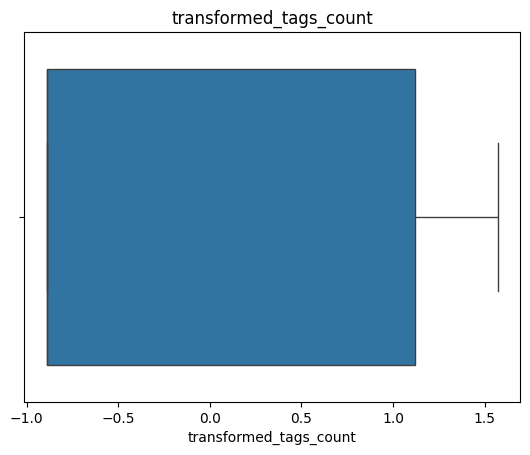

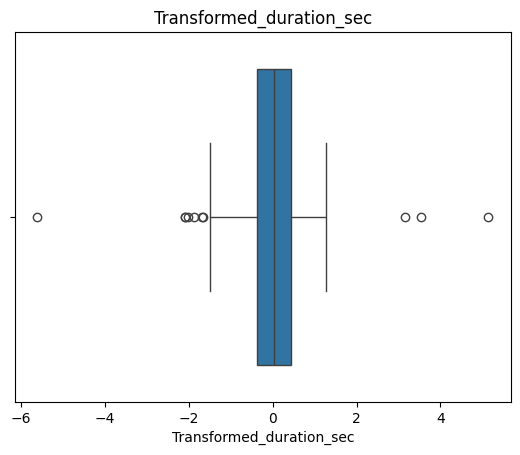

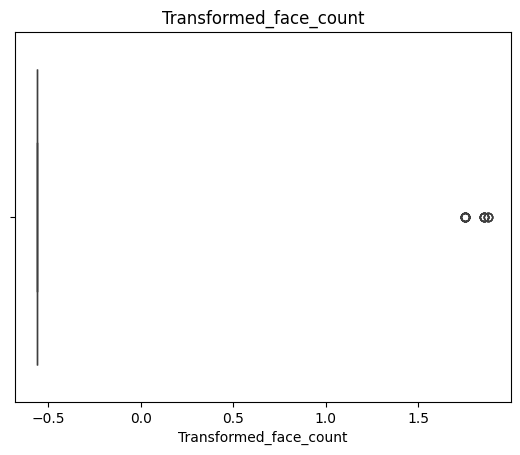

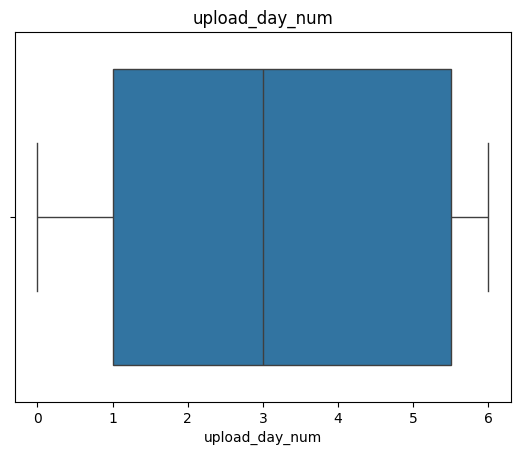

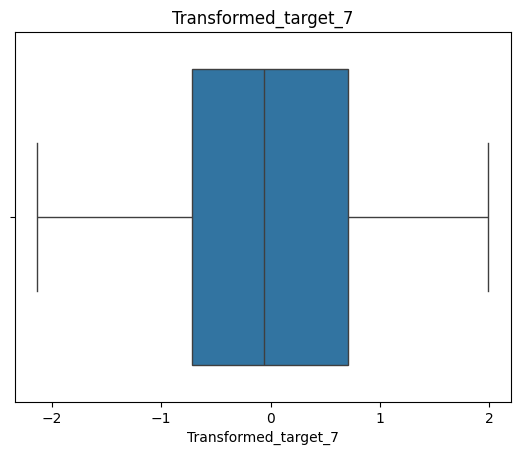

In [36]:
for col in df.select_dtypes(include="number").columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

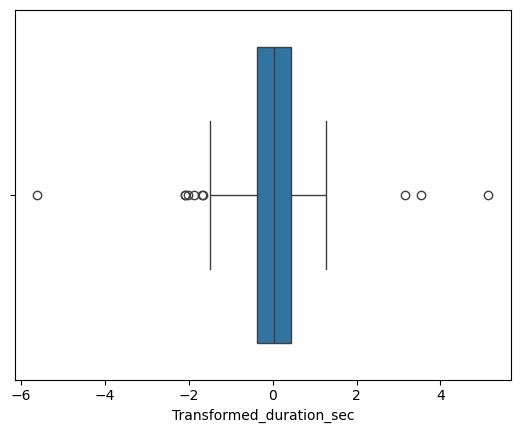

In [37]:
sns.boxplot(x="Transformed_duration_sec",data=df)
plt.show()

In [38]:
Q1=df["Transformed_duration_sec"].quantile(0.25)
Q3=df["Transformed_duration_sec"].quantile(0.75)
IQR=Q3-Q1
IQR

0.8073428550157219

In [39]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

-1.5768694188532963
1.6525020012095912


In [42]:
outliers=df[(df["Transformed_duration_sec"] < lower_bound) | (df["Transformed_duration_sec"] > upper_bound)] 
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 10


In [43]:
df["Transformed_duration_sec"]=df["Transformed_duration_sec"].clip(lower=lower_bound,upper=upper_bound)

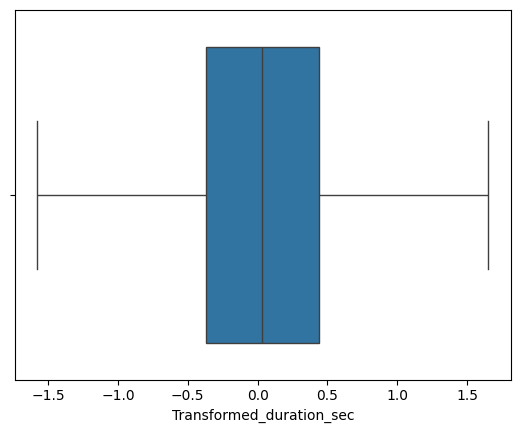

In [44]:
sns.boxplot(x="Transformed_duration_sec",data=df)
plt.show()

In [45]:
Q1=df["Transformed_face_count"].quantile(0.25)
Q2=df["Transformed_face_count"].quantile(0.75)
IQR=Q3-Q1
lower_fench=Q1-1.5*IQR
upper_fench=Q3-1.5*IQR

df["Transformed_face_count"]=df["Transformed_face_count"].clip(lower=lower_fench,upper=upper_fench)

In [47]:
df

,thumbnail_brightness,subscriber_count,upload_hour,title_length,discription_length_transformed,transformed_tags_count,Transformed_duration_sec,Transformed_face_count,upload_day_num,Transformed_target_7
0,69.310378,448000,16,37,0.828716,-0.891861,0.228716,-1.057392,3,1.991369
1,52.409551,448000,14,31,0.910840,0.845204,0.863943,-1.057392,2,1.718302
2,79.515843,448000,10,96,1.309002,1.366056,0.978697,-1.057392,6,1.580424
3,18.923227,448000,12,14,-0.292002,1.385251,-0.937975,-1.057392,4,1.384482
4,51.961427,448000,14,47,1.172050,1.509197,-0.747935,-1.057392,1,0.567916
...,...,...,...,...,...,...,...,...,...,...
134,59.649147,93000,10,40,-0.012079,1.166154,0.595481,-1.057392,4,-0.360208
135,3.305347,93000,15,60,-0.725854,0.845204,0.095540,-1.057392,3,-1.463899
136,60.521495,93000,10,44,-0.406619,1.205007,-0.274149,-1.057392,2,-2.131589
137,74.725434,93000,12,56,0.795294,1.449213,-0.284167,-1.057392,2,-1.106980


In [48]:
import numpy as np

In [50]:
df["uploade_day_sin"]=np.sin(2*np.pi*df["upload_day_num"]/7)
df["uploade_day_cos"]=np.cos(2*np.pi*df["upload_day_num"]/7)

In [53]:
df=df.drop(columns=["upload_day_num"])

In [54]:
df

,thumbnail_brightness,subscriber_count,upload_hour,title_length,discription_length_transformed,transformed_tags_count,Transformed_duration_sec,Transformed_face_count,Transformed_target_7,uploade_day_sin,uploade_day_cos
0,69.310378,448000,16,37,0.828716,-0.891861,0.228716,-1.057392,1.991369,0.433884,-0.900969
1,52.409551,448000,14,31,0.910840,0.845204,0.863943,-1.057392,1.718302,0.974928,-0.222521
2,79.515843,448000,10,96,1.309002,1.366056,0.978697,-1.057392,1.580424,-0.781831,0.623490
3,18.923227,448000,12,14,-0.292002,1.385251,-0.937975,-1.057392,1.384482,-0.433884,-0.900969
4,51.961427,448000,14,47,1.172050,1.509197,-0.747935,-1.057392,0.567916,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...
134,59.649147,93000,10,40,-0.012079,1.166154,0.595481,-1.057392,-0.360208,-0.433884,-0.900969
135,3.305347,93000,15,60,-0.725854,0.845204,0.095540,-1.057392,-1.463899,0.433884,-0.900969
136,60.521495,93000,10,44,-0.406619,1.205007,-0.274149,-1.057392,-2.131589,0.974928,-0.222521
137,74.725434,93000,12,56,0.795294,1.449213,-0.284167,-1.057392,-1.106980,0.974928,-0.222521


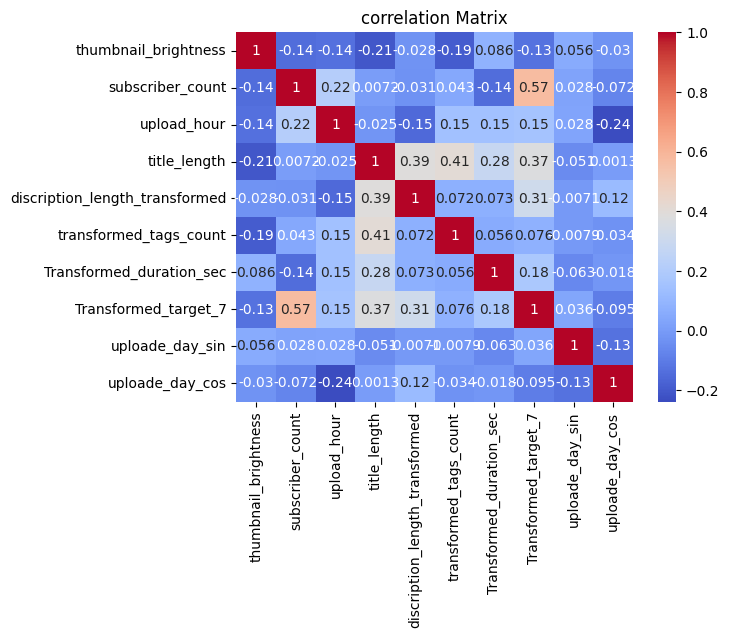

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True,cmap="coolwarm")
plt.title("correlation Matrix")
plt.show()

In [63]:
# vip check (variance inflation factor )
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

In [66]:
df.columns

Index(['thumbnail_brightness', 'subscriber_count', 'upload_hour',
       'title_length', 'discription_length_transformed',
       'transformed_tags_count', 'Transformed_duration_sec',
       'Transformed_face_count', 'Transformed_target_7', 'uploade_day_sin',
       'uploade_day_cos'],
      dtype='object')

In [67]:
x=df[['thumbnail_brightness', 'subscriber_count', 'upload_hour',
       'title_length', 'discription_length_transformed',
       'transformed_tags_count', 'Transformed_duration_sec',
       'Transformed_face_count', 'Transformed_target_7', 'uploade_day_sin',
       'uploade_day_cos']]

In [73]:
X_const=add_constant(x)
vif=pd.DataFrame()
vif["feature"]= X_const.columns
vif["VIF"]=[variance_inflation_factor(X_const.values, i) for i in range (X_const.shape[1])]
print(vif)

                           feature        VIF
0             thumbnail_brightness   1.130324
1                 subscriber_count   1.874535
2                      upload_hour   1.231235
3                     title_length   1.778850
4   discription_length_transformed   1.351998
5           transformed_tags_count   1.282639
6         Transformed_duration_sec   1.273566
7           Transformed_face_count  24.253328
8             Transformed_target_7   2.227297
9                  uploade_day_sin   1.029391
10                 uploade_day_cos   1.103346


In [77]:
df=df.drop(columns=["Transformed_face_count"])

In [78]:
df

,thumbnail_brightness,subscriber_count,upload_hour,title_length,discription_length_transformed,transformed_tags_count,Transformed_duration_sec,Transformed_target_7,uploade_day_sin,uploade_day_cos
0,69.310378,448000,16,37,0.828716,-0.891861,0.228716,1.991369,0.433884,-0.900969
1,52.409551,448000,14,31,0.910840,0.845204,0.863943,1.718302,0.974928,-0.222521
2,79.515843,448000,10,96,1.309002,1.366056,0.978697,1.580424,-0.781831,0.623490
3,18.923227,448000,12,14,-0.292002,1.385251,-0.937975,1.384482,-0.433884,-0.900969
4,51.961427,448000,14,47,1.172050,1.509197,-0.747935,0.567916,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...
134,59.649147,93000,10,40,-0.012079,1.166154,0.595481,-0.360208,-0.433884,-0.900969
135,3.305347,93000,15,60,-0.725854,0.845204,0.095540,-1.463899,0.433884,-0.900969
136,60.521495,93000,10,44,-0.406619,1.205007,-0.274149,-2.131589,0.974928,-0.222521
137,74.725434,93000,12,56,0.795294,1.449213,-0.284167,-1.106980,0.974928,-0.222521


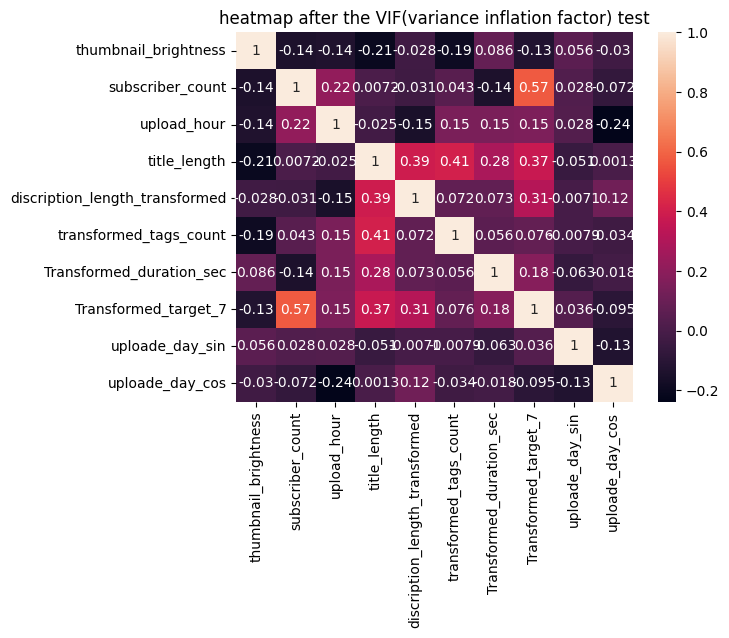

In [80]:
correlation_matrix=df.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title("heatmap after the VIF(variance inflation factor) test")
plt.show()

In [82]:
df

,thumbnail_brightness,subscriber_count,upload_hour,title_length,discription_length_transformed,transformed_tags_count,Transformed_duration_sec,Transformed_target_7,uploade_day_sin,uploade_day_cos
0,69.310378,448000,16,37,0.828716,-0.891861,0.228716,1.991369,0.433884,-0.900969
1,52.409551,448000,14,31,0.910840,0.845204,0.863943,1.718302,0.974928,-0.222521
2,79.515843,448000,10,96,1.309002,1.366056,0.978697,1.580424,-0.781831,0.623490
3,18.923227,448000,12,14,-0.292002,1.385251,-0.937975,1.384482,-0.433884,-0.900969
4,51.961427,448000,14,47,1.172050,1.509197,-0.747935,0.567916,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...
134,59.649147,93000,10,40,-0.012079,1.166154,0.595481,-0.360208,-0.433884,-0.900969
135,3.305347,93000,15,60,-0.725854,0.845204,0.095540,-1.463899,0.433884,-0.900969
136,60.521495,93000,10,44,-0.406619,1.205007,-0.274149,-2.131589,0.974928,-0.222521
137,74.725434,93000,12,56,0.795294,1.449213,-0.284167,-1.106980,0.974928,-0.222521


In [84]:
from sklearn.model_selection import train_test_split
X=df[['thumbnail_brightness', 'subscriber_count', 'upload_hour',
       'title_length', 'discription_length_transformed',
       'transformed_tags_count', 'Transformed_duration_sec', 'uploade_day_sin',
       'uploade_day_cos']]
y=df[["Transformed_target_7"]]


In [85]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [89]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [91]:
print("R2 score:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.6107387021503348
MSE: 0.4872374243289087


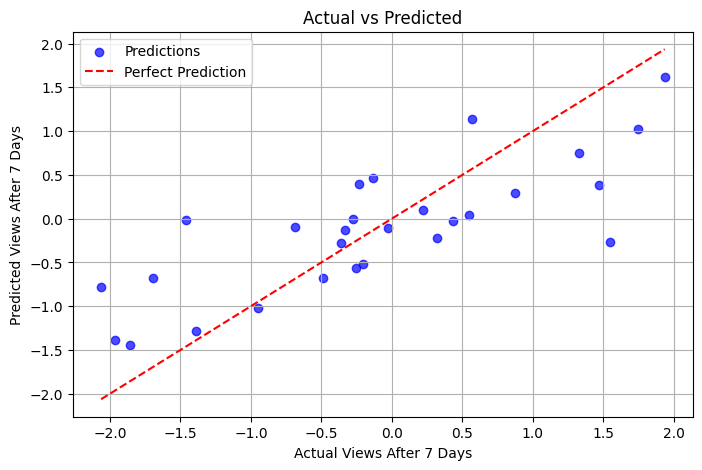

In [173]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Views After 7 Days")
plt.ylabel("Predicted Views After 7 Days")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [187]:
model.coef_

array([[ 4.29503386e-05,  3.48801936e-06,  1.39948912e-02,
         1.42698423e-02,  1.95954039e-01, -9.18640286e-02,
         1.88475126e-01,  1.34363862e-01, -5.93982028e-02]])

In [188]:
model.intercept_

array([-1.31178729])

In [190]:
df.columns

Index(['thumbnail_brightness', 'subscriber_count', 'upload_hour',
       'title_length', 'discription_length_transformed',
       'transformed_tags_count', 'Transformed_duration_sec',
       'Transformed_target_7', 'uploade_day_sin', 'uploade_day_cos'],
      dtype='object')

In [193]:
input=np.array([[0.30, 15000, 6,  70, 400, 9, 600.0, 0.0, 1.0]])
prediction=model.predict(input)
print(prediction)

[[190.40392089]]


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [194]:
X_test


,thumbnail_brightness,subscriber_count,upload_hour,title_length,discription_length_transformed,transformed_tags_count,Transformed_duration_sec,uploade_day_sin,uploade_day_cos
135,3.305347,93000,15,60,-0.725854,0.845204,0.095540,0.433884,-0.900969
66,120.228617,244000,18,19,-1.865135,-0.038972,0.820215,0.433884,-0.900969
31,20.269608,518000,17,45,0.324527,-0.891861,0.794859,0.000000,1.000000
118,32.231229,20300,18,26,-1.028794,-0.891861,-0.472051,0.974928,-0.222521
42,109.356738,518000,10,10,-1.379337,-0.891861,-1.482876,0.974928,-0.222521
12,66.848999,192000,16,80,1.402404,1.449213,0.826512,-0.433884,-0.900969
51,100.912535,225000,14,22,0.359103,1.121683,0.496353,-0.781831,0.623490
68,117.998057,244000,14,27,-1.245935,0.571815,0.069717,0.000000,1.000000
126,103.823235,20300,17,28,-1.312065,-0.891861,-0.397222,0.781831,0.623490
55,17.212851,225000,6,20,-0.083371,-0.891861,-0.185833,-0.781831,0.623490


In [197]:
X_test[:1]

,thumbnail_brightness,subscriber_count,upload_hour,title_length,discription_length_transformed,transformed_tags_count,Transformed_duration_sec,uploade_day_sin,uploade_day_cos
135,3.305347,93000,15,60,-0.725854,0.845204,0.09554,0.433884,-0.900969


In [199]:
input1=np.array([[3.305347,93000,15,60,-0.725854,0.845204,0.09554,0.433884,-0.900969]])
prediction=model.predict(input1)
print(prediction)

[[-0.0112023]]


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [200]:
import joblib 
joblib.dump(model,"yt_analyzer.pkl")

['yt_analyzer.pkl']